In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))
X = X[:, [2,3]]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.svm import SVC

In [10]:
svc_linear = SVC(kernel='linear', C = 1.0, random_state = 1 )

In [11]:
svc_linear.fit(X_train_std, y_train) #X는 표준화 함

SVC(kernel='linear', random_state=1)

In [12]:
svc_linear.score(X_train_std, y_train) #SVC의 결과를 가지고 정확도를 알아봄/ score => 정확도

0.9523809523809523

In [14]:
svc_linear.score(X_test_std, y_test) #test값을 넣음

0.9777777777777777

## 커널 기법

In [15]:
svc_rbf = SVC(kernel='rbf', random_state = 1)

In [16]:
svc_rbf.fit(X_train_std, y_train)

SVC(random_state=1)

In [18]:
svc_rbf.score(X_train_std, y_train)

0.9619047619047619

In [19]:
svc_rbf.score(X_test_std, y_test)

0.9777777777777777

## 결정트리

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))
X = X[:, [2,3]]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier # Classifier => 분류

In [10]:
tree = DecisionTreeClassifier(random_state = 1)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
tree.score(X_train, y_train) #과대적합인지 의심해본다 => 

0.9904761904761905

In [15]:
tree.score(X_test, y_test)

0.9777777777777777

In [16]:
tree.get_depth()

6

In [17]:
tree.get_n_leaves()

8

In [18]:
tree2 = DecisionTreeClassifier(max_depth=2, random_state=1)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [19]:
tree2.score(X_train, y_train)

0.9523809523809523

In [21]:
tree2.score(X_test, y_test)

0.9555555555555556

In [22]:
from sklearn.tree import plot_tree

[Text(178.56, 362.4, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(89.28, 217.44, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(267.84000000000003, 217.44, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(178.56, 72.47999999999996, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(357.12, 72.47999999999996, 'gini = 0.219\nsamples = 40\nvalue = [0, 5, 35]')]

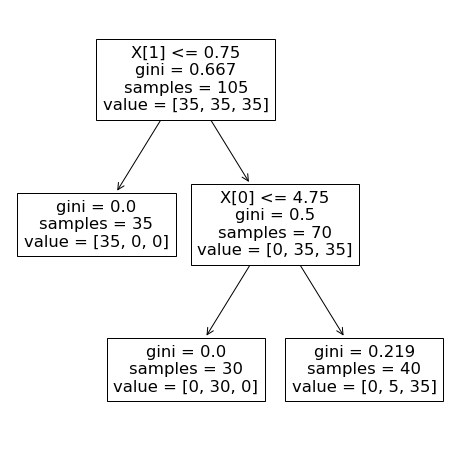

In [23]:
plt.figure(figsize=(8,8))
plot_tree(tree2)

### x[0] => 꽃잎의 길이 , x[1]=> 꽃잎의 너비

In [25]:
tree2.predict([[6,2.5]])

array([2])

In [27]:
tree2.feature_importances_

array([0.42857143, 0.57142857])